In [1]:
import pandas as pd
import numpy as np
import re

# match用法

In [2]:
s1='ab黄cd同abc学'

In [12]:
r1=re.search('a',s1)
r1.group()

'a'

In [20]:
re.findall('[b|c]',s1)

['b', 'c', 'b', 'c']

In [285]:
html = '''<html>
<head lang="en">
<title>Title</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
</head>
<body>
   <div id="content">
       <ul id="ul1">
           <li>first</li>
           <li>second</li>
           <li>third</li>
       </ul>
       <ul id="ul2">
           <li>alpha</li>
           <li>beta</li>
       </ul>
    </div>
    <div id="url">
        < a href="http:www.baidu.com" title="baidu">baidu</ a>
        < a href="http:www.tipdm.com" title="tipdm">tipdm</ a>
    </div>
</body>
</html>
'''

In [287]:
re.findall('http:.*.com',html)

['http:www.baidu.com', 'http:www.tipdm.com']

In [45]:
re.findall('<li>(.*?)</li>',html)

['first', 'second', 'third', 'alpha', 'beta']

In [51]:
re.findall('href="(.*?)"',html)

['http:www.baidu.com', 'http:www.tipdm.com']

# 房价 

In [ ]:
an=' 绿景新美域 大两房 东南向 地铁口物业 业主诚心卖 绿景花园二期   | 2室1厅 | 72.68平米 | 南 | 精装 低楼层(共29层)2005年建板塔结合  -  房本满五年 472 万 单价64943元'
print (re.findall(r'\s.{5}\s',an))
#用空格隔开，且有五个字符的字符串
print (re.search(r'\s(.{5,6})(?:期)\s+',an).group())
#找到首个有六个字符串短语  
print (re.search(r'\s(?:低)(.{10,20})(?:合)|(?:结)\s+',an).group())
#以低开始并以合结束的，中间10到20个字符的字符串
sp_an=[x for  x  in re.split(' ',an) if str(x) !='' and str(x).find('东')!=-1]
print (sp_an)
#字符串的find方法应用。用空格分割整个字符串并找到含有东这个字的字符串
sp_bn=[x for  x  in re.split(' ',an) if str(x) !='' and str(x).__contains__('房本')]
print (sp_bn)
#用空格分割字符串并找到含有房本这两个字的字符
print ([x for x in re.findall('\S+',an) if str(x).__contains__('室')])
#找到字符串中不是空格的字符，并找到其中含有室这个字的字符串
print(re.match('(?P<de1>.*)\|(?P<de2>.*)\|(?P<de3>.*)\|(?P<de4>.*)\|(?P<de5>.*)-(?P<de6>.*)',an).group('de6'))
print (re.split('\s',an))
print (re.split('(口|业)',an))
print (re.search(r'\s(?:低|业)(.{3,20})(?:合|卖)\s+',an).group())
print (re.search(r'\d+(?:平米)',an).group())


In [52]:
an=' 绿景新美域 大两房 东南向 地铁口物业 业主诚心卖 绿景花园二期   | 2室1厅 | 72.68平米 | 南 | 精装 低楼层(共29层)2005年建板塔结合  -  房本满五年 472 万 单价64943元'
print (re.findall(r'\s.{5}\s',an))

[' 绿景新美域 ', ' 地铁口物业 ', ' | 南 | ', ' 房本满五年 ']


In [59]:
print (re.findall(r'(.+\d)',an))

[' 绿景新美域 大两房 东南向 地铁口物业 业主诚心卖 绿景花园二期   | 2室1厅 | 72.68平米 | 南 | 精装 低楼层(共29层)2005年建板塔结合  -  房本满五年 472 万 单价64943']


# 常用的格式校验
- 邮箱验证
- IP地址验证
- 电话号码验证
- 身份证号码验证
- 密码强度验证
- 网址验证
- 汉字验证  [\u4e00-\u9fa5]
- ......
- 凡是有一定规律的,批量的数据获取，都可以使用正则表达式来完成

In [5]:
import re
import pandas as pd
import numpy as np

In [11]:
s = '贪心学院的官网是:http://www.greeedyal.com'
#汉字unicode范围
re.findall('[\u4e00-\u9fa5]', s)

['贪', '心', '学', '院', '的', '官', '网', '是']

In [15]:
##正式入门,返回值是一个列表
s = 'hello world'
reg='hello'
re.findall(reg,s)

['hello']

In [17]:
s = 'hello world'
reg='l'
re.findall(reg,s)[1]

'l'

## 元字符 

|字符|说明|
|--|--|
|.|代表的是换行符以外的任意字符。 换行符是：(不同的操作系统有不同的换行符) \n \r\n|
|\w|匹配字母、数字、下划线、汉字的一个字符|
|\s|匹配任意的空白符|
|\d|匹配数字|
|^|匹配字符串的开始|
|$|匹配字符串的结束|

In [29]:
s='1,成都,泸沽湖,\
1145,376,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店\
+ 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早'


In [31]:
#.表示除了换行符的所有单个字符
r=re.findall('.',s)
print(r)

['1', ',', '成', '都', ',', '泸', '沽', '湖', ',', '1', '1', '4', '5', ',', '3', '7', '6', ',', '成', '都', '-', '泸', '沽', '湖', '3', '天', '2', '晚', ' ', '|', ' ', '入', '住', '7', '天', '酒', '店', '丽', '江', '古', '城', '中', '心', '店', '+', ' ', '成', '都', '航', '空', '往', '返', '机', '票', ',', '7', '天', '酒', '店', '丽', '江', '古', '城', '中', '心', '店', ' ', '经', '济', '型', ' ', '4', '.', '0', '分', '/', '5', '分', ',', '经', '济', '房', '-', '不', '含', '早', '-', '限', '时', '特', '.', '.', '.', ' ', '其', '他', ' ', '不', '含', '早']


In [32]:
print(re.findall('\w',s))

['1', '成', '都', '泸', '沽', '湖', '1', '1', '4', '5', '3', '7', '6', '成', '都', '泸', '沽', '湖', '3', '天', '2', '晚', '入', '住', '7', '天', '酒', '店', '丽', '江', '古', '城', '中', '心', '店', '成', '都', '航', '空', '往', '返', '机', '票', '7', '天', '酒', '店', '丽', '江', '古', '城', '中', '心', '店', '经', '济', '型', '4', '0', '分', '5', '分', '经', '济', '房', '不', '含', '早', '限', '时', '特', '其', '他', '不', '含', '早']


In [36]:
print(re.findall('\d',s))

['1', '1', '1', '4', '5', '3', '7', '6', '3', '2', '7', '7', '4', '0', '5']


In [38]:
print(re.findall('^\w',s))

['1']


In [39]:
#正则表达式的范围匹配
print(re.findall('[0-9]',s))

['1', '1', '1', '4', '5', '3', '7', '6', '3', '2', '7', '7', '4', '0', '5']


In [42]:
#0-9或a-z或A-Z
print(re.findall('[0-9a-zA-Z]',s))

['1', '1', '1', '4', '5', '3', '7', '6', '3', '2', '7', '7', '4', '0', '5']


In [40]:
print(re.findall('[123]',s))

['1', '1', '1', '3', '3', '2']


## 反义代码

反义代码的意思就是与元字符表示相反的代码

- \W 匹配的任意 不是 字母、数字、下划线、汉字 的字符
- \S 匹配任意 不是 空白符的字符
- \D 匹配任意 不是 数字的字符

##都匹配|[\d\D]

## 限定符 

|符号|说明|
|--|--|
|*|代表的重复0次或者是多次|
|+|代表的是重复1次或者是多次|
|?|代表的是重复0次或者是1次|
|{n}|重复n次，举例：{3}指的就是重复3次|
|{n,}|重复n次或者更多次数|
|{n,m}|重复n次到m次，所以这里m一般要比n大|

In [60]:
#把w这个字库扩出来
s = '贪心学院的官网是：http://www.greedyai.com'
reg = 'http://[w]{3}\.[a-z0-9]+\.com'

re.findall(reg,s)

['http://www.greedyai.com']

In [56]:
#把w这个字库扩出来，加上[]就是一个优先级
s = '贪心学院的官网是：http://www.greedyai.com'
reg = 'http://www\.[a-z0-9]+\.com'

re.findall(reg,s)

['http://www.greedyai.com']

In [75]:
#把w这个字库扩出来，www.后的所有字符匹配多次
s = '贪心学院的官网是：http://www.greedyai.com'
reg = 'http://www.[\w\W]*\.com$'

re.findall(reg,s)

['http://www.greedyai.com']

In [87]:
#因为*包含了0，所以会出现这个
s = '我的qq号是240102989'
re.findall('\d*',s)

['', '', '', '', '', '', '240102989', '']

In [413]:
s = '我的qq号是240102989'
re.findall('\d+',s)

['240102989']

In [88]:
s = '我的qq号是240102989'
re.findall('\d{5,12}',s)

['240102989']

## 分组匹配 加上括号来匹配

In [90]:
s = '我的qq号是240102989,我的邮编是22002'
re.findall('\d+',s)

['240102989', '22002']

In [419]:
s='我的手机号是19821832425'
re.findall('\d[1-9]{1,10}',s)

['19821832425']

In [417]:
#显示的值会使一个元组
s = '我的qq号是240102989,我的邮编是22002'
re.findall('(\d{9}).*(\d{5})',s)

[('240102989', '22002')]

In [135]:
s = '我的qq号是240102989,我的邮编是22002'
re.findall('(\d{9}).*(\d{5})',s)[0][1]

'22002'

In [110]:
re.findall('\d{9}.*\d{5}',s)

['240102989,我的邮编是22002']

In [116]:
#0代表所有，1代表分的第一组，2代表分的第二组,每个括号的正则表达式表达匹配一组
re.search('(\d{9}).*(\d{5})',s).group(0)

'240102989,我的邮编是22002'

In [117]:
re.search('(\d{9}).*(\d{5})',s).group(1)

'240102989'

In [121]:
#match匹配开头,相比findall匹配一次就结束
s = 'hello asd hellodsd'
re.findall('hello',s)

['hello', 'hello']

In [126]:
re.match('hello',s).group()

'hello'

In [128]:
#匹配开头
s = 'aahello asd hellodsd'
re.match('hello',s).group()

AttributeError: 'NoneType' object has no attribute 'group'

In [129]:
#匹配第一个
s = 'aahello asd hellodsd'
re.search('hello',s).group()

'hello'

findall / search/match 区别
- findall 是查找所有的
- search 匹配第一个
- match  匹配开头的

## 贪婪与非贪婪 

- 贪婪的意思是尽可能多的匹配
- 非贪婪的意思就是尽可能少的匹配
- 非贪婪操作符是问号：'符号?' 


- ?号代表的是重复0次或者是1次，再加一个问号，代表的是非贪婪操作，那么最后就只匹配0次

In [152]:
#限定符限定最邻近的字符，这里是i，如果限定符前面是\d则匹配很多数字
s = 'gggggggreedyaiiiiiiii'
re.findall('greedyai??',s)

['greedya']

In [153]:
s = 'gggggggreedyaiiiiiiii'
re.findall('ggreedyai?',s)

['ggreedyai']

In [160]:
s = 'gggggggreedyaiiiiiiii'
re.findall('g*reedyai??',s)

['gggggggreedya']

## 分支条件匹配

- 使用 | 来分隔开不同的正则表达式，代表着 条件1 或 条件2 或条件3 ......

In [181]:
s = '电话号码有： 010-78472328      0431-9837523     0432-97462743'

# 分支条件匹配原则，前边的条件尽量匹配少的数据，后边的条件匹配多的数据
re.findall('010.\d*|0431.*',s)

['010-78472328', '0431-9837523     0432-97462743']

In [184]:
re.findall('\d{3}-\d*|\d{4}-\d*',s)

['010-78472328', '0431-9837523', '0432-97462743']

## 零宽断言 

- 匹配"正则表达式reg"前边的位置  (?=reg)
- 匹配"正则表达式reg"后边的位置  (?<=reg)
- 匹配后边跟的不是"正则表达式reg"的位置 (?!reg)
- 匹配前边不是"正则表达式reg"的位置  (?<!reg)

In [191]:
#匹配前面的内容
s = 'hellogreedyailove'
reg='l{2}o(?=greedyai)'
re.findall(reg,s)

['llo']

In [192]:
s = "5c714bb4397be4c5251a65c3,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元,https://m.lianjia.com/chuzu/bj/zufang/BJ2191007111268540416.html,153,11000,元/月,天时名苑,整租"

reg = ",(?=http)"
re.findall(reg,s)

[',']

In [193]:
reg = "(?<=11000元),"
re.findall(reg,s)

[',']

# 项目实战

In [194]:
import os
import pandas as pd
import re
import numpy as np

In [195]:
os.chdir(r'C:\Users\飘哥\Desktop\练习代码\贪心数据\使用正则进行数据的复杂筛选')

## 酒店数据 

In [211]:
data=pd.read_csv('旅游.csv',index_col=0)
data.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25


In [257]:
#extrat是利用正则表达式抽取数据，必须有分组，取的是分组内的数据，要啥必须括上
# data['酒店评分']=data.酒店.apply(lambda x:re.findall('(\d\.\d)分',x)[0])
data['酒店评分']=data.酒店.str.extract('(\d\.\d)分')
data.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分,类型
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7,舒适型
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0,经济型
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5,舒适型
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6,舒适型
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1,高档型


In [256]:
# data['类型']=data.酒店.str.extract('(\w\w型)')
# data['类型']=data.酒店.str.extract('(\w+型)')
data['类型']=data.酒店.str.extract('\s(\w+)\s')
data.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分,类型
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7,舒适型
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0,经济型
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5,舒适型
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6,舒适型
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1,高档型


In [265]:
data['天数']=data.路线名.str.extract('(\d天\d晚)')
data.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分,类型,几天几晚,天数
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7,舒适型,3天2晚,3天2晚
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0,经济型,3天2晚,3天2晚
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5,舒适型,3天2晚,3天2晚
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6,舒适型,3天2晚,3天2晚
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1,高档型,3天2晚,3天2晚


## 租房数据

In [299]:
zufang=pd.read_csv('租房.csv',index_col=0).reset_index(drop=True)
zufang.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.c...,72,6000,元/月,宝汇苑,整租
1,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元https://m.lianjia.com/chuzu/bj...,153,11000,元/月,天时名苑,整租
2,2,3,朝阳公园,北京,朝阳,296.0,东北,2,近地铁 精装 双卫生间,整租 · 丽水嘉园 3室2厅 16300元https://m.lianjia.com/chu...,133,16300,元/月,丽水嘉园,整租
3,1,2,六铺炕,北京,西城,1177.0,南 北,1,精装 集中供暖 随时看房,整租 · 黄寺大街24号院精装修两居室 南北通透 中间楼层https://m.lianjia...,60,8500,元/月,黄寺大街24号院,整租
4,1,2,科技园区,北京,丰台,993.0,南 北,1,近地铁 精装 集中供暖,整租 · 京投银泰万科西华府 2室1厅 7300元https://m.lianjia.com...,83,7300,元/月,京投银泰万科西华府,整租


In [283]:
# zufang['url']=zufang.house_title.str.extract('(https://[\w\W]*)')
zufang['url']=zufang.house_title.str.extract('(https://.*)')
zufang.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,rent_area,rent_price_listing,rent_price_unit,resblock_name,type,url
0,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.c...,72,6000,元/月,宝汇苑,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ218966...
1,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元https://m.lianjia.com/chuzu/bj...,153,11000,元/月,天时名苑,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ219100...
2,2,3,朝阳公园,北京,朝阳,296.0,东北,2,近地铁 精装 双卫生间,整租 · 丽水嘉园 3室2厅 16300元https://m.lianjia.com/chu...,133,16300,元/月,丽水嘉园,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ217730...
3,1,2,六铺炕,北京,西城,1177.0,南 北,1,精装 集中供暖 随时看房,整租 · 黄寺大街24号院精装修两居室 南北通透 中间楼层https://m.lianjia...,60,8500,元/月,黄寺大街24号院,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ211269...
4,1,2,科技园区,北京,丰台,993.0,南 北,1,近地铁 精装 集中供暖,整租 · 京投银泰万科西华府 2室1厅 7300元https://m.lianjia.com...,83,7300,元/月,京投银泰万科西华府,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ212014...


In [284]:
zufang.url

0       https://m.lianjia.com/chuzu/bj/zufang/BJ218966...
1       https://m.lianjia.com/chuzu/bj/zufang/BJ219100...
2       https://m.lianjia.com/chuzu/bj/zufang/BJ217730...
3       https://m.lianjia.com/chuzu/bj/zufang/BJ211269...
4       https://m.lianjia.com/chuzu/bj/zufang/BJ212014...
                              ...                        
8404    https://m.lianjia.com/chuzu/gz/zufang/GZ209759...
8405    https://m.lianjia.com/chuzu/gz/apartment/layou...
8406    https://m.lianjia.com/chuzu/gz/zufang/GZ216267...
8407    https://m.lianjia.com/chuzu/gz/apartment/layou...
8408    https://m.lianjia.com/chuzu/gz/zufang/GZ202798...
Name: url, Length: 8409, dtype: object

In [288]:
zufang.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,rent_area,rent_price_listing,rent_price_unit,resblock_name,type,url
0,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.c...,72,6000,元/月,宝汇苑,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ218966...
1,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元https://m.lianjia.com/chuzu/bj...,153,11000,元/月,天时名苑,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ219100...
2,2,3,朝阳公园,北京,朝阳,296.0,东北,2,近地铁 精装 双卫生间,整租 · 丽水嘉园 3室2厅 16300元https://m.lianjia.com/chu...,133,16300,元/月,丽水嘉园,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ217730...
3,1,2,六铺炕,北京,西城,1177.0,南 北,1,精装 集中供暖 随时看房,整租 · 黄寺大街24号院精装修两居室 南北通透 中间楼层https://m.lianjia...,60,8500,元/月,黄寺大街24号院,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ211269...
4,1,2,科技园区,北京,丰台,993.0,南 北,1,近地铁 精装 集中供暖,整租 · 京投银泰万科西华府 2室1厅 7300元https://m.lianjia.com...,83,7300,元/月,京投银泰万科西华府,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ212014...


In [289]:
def str_concat(a,b):
    return str(a)+'室'+str(b)+'厅'

In [290]:
str_concat(1,2)

'1室2厅'

In [300]:
zufang['户型']=zufang.apply(lambda x:str_concat(x.bedroom_num,x.bathroom_num),axis=1)
zufang.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,rent_area,rent_price_listing,rent_price_unit,resblock_name,type,户型
0,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.c...,72,6000,元/月,宝汇苑,整租,2室1厅
1,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元https://m.lianjia.com/chuzu/bj...,153,11000,元/月,天时名苑,整租,3室2厅
2,2,3,朝阳公园,北京,朝阳,296.0,东北,2,近地铁 精装 双卫生间,整租 · 丽水嘉园 3室2厅 16300元https://m.lianjia.com/chu...,133,16300,元/月,丽水嘉园,整租,3室2厅
3,1,2,六铺炕,北京,西城,1177.0,南 北,1,精装 集中供暖 随时看房,整租 · 黄寺大街24号院精装修两居室 南北通透 中间楼层https://m.lianjia...,60,8500,元/月,黄寺大街24号院,整租,2室1厅
4,1,2,科技园区,北京,丰台,993.0,南 北,1,近地铁 精装 集中供暖,整租 · 京投银泰万科西华府 2室1厅 7300元https://m.lianjia.com...,83,7300,元/月,京投银泰万科西华府,整租,2室1厅


## 评论数据 

In [302]:
pinlun=pd.read_csv('评论.csv')
pinlun.head()

,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos


In [308]:
#什么是用户的评论时间
time=pinlun.creationTime.str.extract(' (.*)')
time.head()

,0
0,13:01:54
1,10:45:33
2,10:58:33
3,20:22:33
4,09:19:16


In [311]:
pinlun['hour']=time[0].str.extract('^(\d+):')
pinlun.head()

,content,creationTime,nickname,referenceName,content_type,hour
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,13
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,10
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,10
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,20
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,09


In [324]:
height=pinlun.groupby('hour').count()
height

,content,creationTime,nickname,referenceName,content_type
hour,,,,,
00,35,35,35,35,35
01,17,17,17,17,17
02,5,5,5,5,5
03,5,5,5,5,5
04,5,5,5,5,5
05,7,7,7,7,7
06,17,17,17,17,17
07,49,49,49,49,49
08,83,83,83,83,83


In [316]:
import matplotlib.pyplot as plt
%matplotlib inline

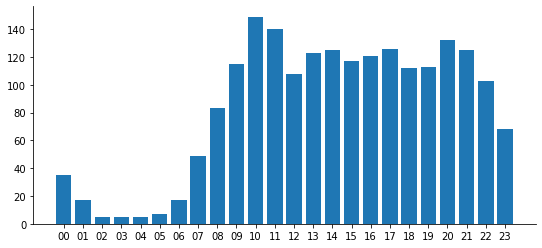

In [332]:
fig,ax=plt.subplots(figsize=(9,4))
plt.bar(height.index,height.content)
#设置边框
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)

## 绘制词云图


In [338]:
import jieba

data = '我爱北京天安门，天安门上太阳升'

# cut_all = True 全模式切割
s = jieba.cut(data,cut_all=True)
r = '-'.join(s)
print(r)


# 精确模式
s = jieba.cut(data,cut_all=False)
r = '-'.join(s)
print(r)

# 搜索模式

s = jieba.cut_for_search(data)
r = '-'.join(s)
print(r)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\飘哥\AppData\Local\Temp\jieba.cache
Loading model cost 0.683 seconds.
Prefix dict has been built successfully.


我-爱-北京-天安-天安门-，-天安-天安门-门上-太阳-太阳升
我-爱-北京-天安门-，-天安门-上-太阳升
我-爱-北京-天安-天安门-，-天安-天安门-上-太阳-太阳升


In [339]:
### cut 返回的结果是一个生成器  

### lcut   list_cut 返回结果是一个列表

In [340]:
s = jieba.lcut(data)
s

['我', '爱', '北京', '天安门', '，', '天安门', '上', '太阳升']

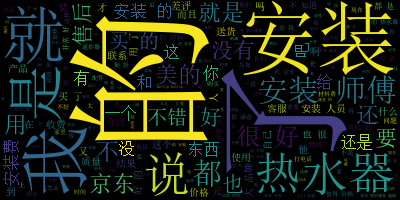

In [354]:
#利用空格拼接到一起
recomment = pinlun['content']
text = ''
for r in recomment:
    if r == ' ':
        continue
    text += r
data_cut = " ".join(jieba.lcut(text))

from wordcloud import WordCloud
font = 'C:\Windows\Fonts\simsun.ttc'
w = WordCloud(font_path=font)
w.generate(data_cut)

image = w.to_file("评论词云图.png")

from PIL import Image
display(Image.open("评论词云图.png"))

## 作业 

- 网址：http://data.10jqka.com.cn/financial/yjyg/
- 从抓取到数据可视化全流程的实现

In [2]:
import requests
result=requests.get('http://data.10jqka.com.cn/financial/yjyg/')
result.text

'<!DOCTYPE html>\n<html>\n<head lang="en">\n    <meta http-equiv="Content-Type" content="text/html; charset=gbk" />\n    <!–[if lte IE 8]>\n    <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7" />\n    <![endif]–>\n    <!–[if IE 9]>\n    <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7;IE=9"/>\n    <![endif]–>\n    <title>业绩预告_数据中心_同花顺财经</title>\n    <meta name="Keywords" content="业绩预告,业绩预增,中报业绩预告,年报业绩预告,业绩预减,净利润变动,两市业绩预告一览" />\n    <meta name="Description" content="同花顺财经财报提供上市公司最新业绩预告、业绩预增、中报业绩预告及年报业绩预告，为投资者提供两市业绩预告一览和业绩预减、净利润变动等数据。" />\n            <link rel="stylesheet" href="//s.thsi.cn/css/datacenter/financial/base.css"/>\r\n    \t\t\t\t<link rel="stylesheet" href="//s.thsi.cn/css/datacenter/financial/page-202008032148.min.css"/>\r\n\t\t\t    <link rel="stylesheet" href="//s.thsi.cn/css/datacenter/iwcxg.css"/>\r\n    <link rel="stylesheet" href="//s.thsi.cn/css/datacenter/hqcss.css"/>\r\n        \t\r\n<style type="text/css">\r\n\r\n    #footer{border-top:1px soli

In [377]:
#加上header访问时候伪装成浏览器
headers={'Accept': 'text/html, */*; q=0.01',
    'hexin-v': 'AyDSJRy2VMFyKujFbcWMdsww8SXxKQTzpg1Y95ox7DvOlc4TQjnUg_YdKIXp',
    'Referer': 'http://data.10jqka.com.cn/financial/yjyg/',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
        }
#page后的是翻页参数
url='http://data.10jqka.com.cn/ajax/yjyg/date/2021-06-30/board/ALL/field/enddate/order/desc/page/{}/ajax/1/free/1/'
#初始化一个空的字符串变量
result=''

for i in range(1,6):
    result+=requests.get(url.format(i),headers=headers).text  #获取到的是网页源代码，加上headers是识别我们的请求
result

'     <div class="page-loading" style="display: none;">\n        <div class="mask"></div>\n        <div class="loading-img"></div>\n    </div>\n     <table class="m-table J-ajax-table J-canvas-table">\n        <thead>\n        <tr class="row2">\n            <th width="40" >序号</th>\n            <th width="78" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'stockcode\'  colidx="1"><a href="javascript:void(0);" class="J-ajax-a" field="STOCKCODE">股票代码</a><i class="arr-down"></i></th>\n            <th width="78" >股票简称</th>\n            <th width="115" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'summ\' ><a href="javascript:void(0);" class="J-ajax-a">业绩预告类型</a><i class="arr-down"></i></th>\n            <th width="350">业绩预告摘要</th>\n            <th width="97" ><a href="javascript:void(0);" class="J-ajax-a" field=\'jlrbl\' >净利润变动幅度<br/>(%)</a><i class="arr-down"></i></th>\n            <th width="135" ><a href="javascript:void(0);" class="J-ajax-a" field=\'SNTQJLR\' >上年同期净

In [380]:
#获取序号
index = re.findall('<td>(.*)</td>',result)
index

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [384]:
#获取股票代码
stock_code = re.findall('stockCode">(.*)</a>',result)
stock_code

['001206',
 '301000',
 '301001',
 '301002',
 '300996',
 '300997',
 '300998',
 '688117',
 '601528',
 '605488',
 '300988',
 '300990',
 '605189',
 '300987',
 '605196',
 '688538',
 '001203',
 '002840',
 '601665',
 '603836',
 '605499',
 '300989',
 '000166',
 '000408',
 '000415',
 '000681',
 '002002',
 '002006',
 '002021',
 '002044',
 '002049',
 '002053',
 '002086',
 '002087',
 '002103',
 '002104',
 '002118',
 '002149',
 '002179',
 '002184',
 '002191',
 '002255',
 '002260',
 '002269',
 '002308',
 '002315',
 '002345',
 '002390',
 '002496',
 '002501',
 '002512',
 '002524',
 '002563',
 '002571',
 '002576',
 '002592',
 '002638',
 '002656',
 '002658',
 '002700',
 '002708',
 '002711',
 '002722',
 '002762',
 '002766',
 '002813',
 '002820',
 '002862',
 '300159',
 '300362',
 '300367',
 '300503',
 '600029',
 '600033',
 '600054',
 '600074',
 '600115',
 '600121',
 '600135',
 '600138',
 '600139',
 '600258',
 '600275',
 '600282',
 '600306',
 '600368',
 '600391',
 '600408',
 '600485',
 '600498',
 '600536',

In [383]:
stock_name = re.findall('class="J_showCanvas">(.*)</a>',result)
stock_name

['依依股份',
 '肇民科技',
 '凯淳股份',
 '崧盛股份',
 '普联软件',
 '欢乐家',
 '宁波方正',
 '圣诺生物',
 '瑞丰银行',
 '福莱新材',
 '津荣天宇',
 '同飞股份',
 '富春染织',
 '川网传媒',
 '华通线缆',
 '和辉光电',
 '大中矿业',
 '华统股份',
 '齐鲁银行',
 '海程邦达',
 '东鹏饮料',
 '蕾奥规划',
 '申万宏源',
 '*ST藏格',
 '渤海租赁',
 '视觉中国',
 '鸿达兴业',
 '精功科技',
 'ST中捷',
 '美年健康',
 '紫光国微',
 '云南能投',
 '*ST东洋',
 '新野纺织',
 '广博股份',
 '恒宝股份',
 '紫鑫药业',
 '西部材料',
 '中航光电',
 '海得控制',
 '劲嘉股份',
 '*ST海陆',
 '*ST德奥',
 '美邦服饰',
 '威创股份',
 '焦点科技',
 '潮宏基',
 '信邦制药',
 '*ST辉丰',
 '*ST利源',
 '达华智能',
 '光正眼科',
 '森马服饰',
 '德力股份',
 '通达动力',
 'ST八菱',
 '*ST勤上',
 'ST摩登',
 '雪迪龙',
 'ST浩源',
 '光洋股份',
 '*ST欧浦',
 '金轮股份',
 '金发拉比',
 '*ST索菱',
 '路畅科技',
 '桂发祥',
 '实丰文化',
 '新研股份',
 '天翔环境',
 'ST网力',
 '昊志机电',
 '南方航空',
 '福建高速',
 '黄山旅游',
 '退市保千',
 '东方航空',
 '郑州煤电',
 '乐凯胶片',
 '中青旅',
 '西部资源',
 '首旅酒店',
 'ST昌鱼',
 '南钢股份',
 '*ST商城',
 '五洲交通',
 '航发科技',
 'ST安泰',
 '*ST信威',
 '烽火通信',
 '中国软件',
 '山东黄金',
 '新华医疗',
 '市北高新',
 '*ST富控',
 '*ST目药',
 '四川金顶',
 '海尔智家',
 '鲁北化工',
 '北汽蓝谷',
 '锦江酒店',
 '洲际油气',
 '新潮能源',
 '友好集团',
 '*ST安信',
 '王府井',
 '*ST中房',
 '厦门空港',
 '华安证券',
 '博汇纸业',
 

In [385]:
# 获取业绩数据
performance = re.findall('<span>(.*)</span>',result)
performance

['业绩预降',
 '业绩预增',
 '业绩预盈',
 '业绩大幅上升',
 '业绩大幅上升',
 '业绩预增',
 '业绩预降',
 '业绩预增',
 '业绩预增',
 '不确定',
 '业绩预增',
 '业绩预增',
 '业绩大幅上升',
 '业绩预增',
 '业绩预盈',
 '预计减亏',
 '业绩大幅上升',
 '业绩大幅上升',
 '业绩预增',
 '业绩预增',
 '业绩大幅上升',
 '业绩预增',
 '不确定',
 '预计扭亏',
 '预计续亏',
 '业绩大幅上升',
 '业绩大幅上升',
 '业绩大幅上升',
 '预计扭亏',
 '预计减亏',
 '业绩大幅上升',
 '业绩预降',
 '业绩预亏',
 '业绩预降',
 '预计扭亏',
 '业绩预亏',
 '预计减亏',
 '业绩大幅上升',
 '业绩大幅上升',
 '业绩大幅上升',
 '业绩预增',
 '业绩大幅下降',
 '业绩预亏',
 '预计减亏',
 '业绩大幅下降',
 '业绩大幅上升',
 '业绩大幅上升',
 '业绩大幅上升',
 '预计扭亏',
 '预计减亏',
 '业绩预亏',
 '预计扭亏',
 '业绩大幅上升',
 '预计扭亏',
 '业绩大幅上升',
 '预计扭亏',
 '预计减亏',
 '业绩预亏',
 '业绩大幅上升',
 '业绩大幅上升',
 '业绩大幅上升',
 '预计扭亏',
 '业绩大幅上升',
 '业绩大幅上升',
 '预计增亏',
 '预计扭亏',
 '预计扭亏',
 '预计扭亏',
 '预计续亏',
 '预计扭亏',
 '预计续亏',
 '业绩大幅上升',
 '不确定',
 '业绩大幅上升',
 '预计扭亏',
 '预计续亏',
 '不确定',
 '不确定',
 '业绩大幅上升',
 '不确定',
 '预计续亏',
 '不确定',
 '预计续亏',
 '业绩大幅上升',
 '预计续亏',
 '业绩大幅上升',
 '预计减亏',
 '业绩大幅上升',
 '预计续亏',
 '业绩大幅上升',
 '预计续亏',
 '不确定',
 '不确定',
 '业绩大幅下降',
 '预计续亏',
 '预计续亏',
 '业绩预增',
 '不确定',
 '业绩大幅上升',
 '预计续亏',
 '不确定',
 '不确定',
 '业绩大幅上升',
 '预计扭亏',
 '不确定'

In [386]:
# 获取摘要
summary = re.findall('target="_blank">(.*)</a>',result)
summary

['净利润7200万元至8200万元,下降幅度为35.25%至25.78%',
 '净利润5505.16万元至6104.53万元,增长幅度为32.92%至47.39%',
 '净利润3400.00万元至4200.00万元,增长幅度为-12.23%至8.42%',
 '净利润6000.00万元至7600.00万元,增长幅度为49.35%至89.17%',
 '净利润3000万元至3600万元,增长幅度为79.93%至115.92%',
 '净利润8600万元至9500万元,增长幅度为1.42%至12.04%',
 '净利润1647.73万元至1824.73万元,下降幅度为27.11%至19.28%',
 '净利润3200万元至3600万元,增长幅度为2.20%至14.98%',
 '净利润48400万元至50700万元,增长幅度为5%至10%',
 '公司预计2021年1-6月经营业绩同比不会发生重大不利变化。',
 '净利润3230万元至3380万元,增长幅度为31.71%至37.82%',
 '净利润5897.00万元至6384.06万元,增长幅度为18.63%至28.43%',
 '净利润7680.71万元至8380.71万元,增长幅度为213.58%至242.16%',
 '扣非后净利润1749.24万元至1831.73万元,增长幅度为5.18%至10.14%',
 '扣非后净利润5903.97万元至6760.45万元,增长幅度为-4.93%至8.86%',
 '净利润-54500万元至-45000万元,增长幅度为0.23%至17.62%',
 '净利润55000万元至65000万元,增长幅度为455.09%至556.02%',
 '净利润18000万元至21000万元,增长幅度为139.34%至179.23%',
 '净利润144000万元至149000万元,增长幅度为10%至13%',
 '净利润10201.88万元至12468.96万元,增长幅度为6.28%至29.90%',
 '净利润57000万元至72000万元,增长幅度为29.16%至63.15%',
 '净利润2800万元至3000万元,增长幅度为4.42%至11.88%',
 '不确定',
 '净利润30000万元至38000万元,增长幅度为311.47%至367.86%',
 '预计公司20

In [389]:
data = pd.DataFrame({
    "stock_code":stock_code,
    "stock_name":stock_name,
    "performance":performance,
    "summary":summary
}, index=index)

data

,stock_code,stock_name,performance,summary
1,001206,依依股份,业绩预降,"净利润7200万元至8200万元,下降幅度为35.25%至25.78%"
2,301000,肇民科技,业绩预增,"净利润5505.16万元至6104.53万元,增长幅度为32.92%至47.39%"
3,301001,凯淳股份,业绩预盈,"净利润3400.00万元至4200.00万元,增长幅度为-12.23%至8.42%"
4,301002,崧盛股份,业绩大幅上升,"净利润6000.00万元至7600.00万元,增长幅度为49.35%至89.17%"
5,300996,普联软件,业绩大幅上升,"净利润3000万元至3600万元,增长幅度为79.93%至115.92%"
...,...,...,...,...
146,000980,*ST众泰,预计减亏,"净利润-75000万元至-50000万元,增长幅度为27.47%至51.65%"
147,002030,达安基因,业绩大幅上升,"净利润135000万元至165000万元,增长幅度为73.41%至111.95%"
148,002034,旺能环境,业绩预增,"净利润30000万元至32000万元,增长幅度为30.77%至39.49%"
149,002055,得润电子,业绩大幅下降,"净利润2500万元至3750万元,下降幅度为85.4%至78.1%"


In [400]:
data.summary.str.extract('幅度为(.*)%至(.*)%')

,0,1
1,35.25,25.78
2,32.92,47.39
3,-12.23,8.42
4,49.35,89.17
5,79.93,115.92
...,...,...
146,27.47,51.65
147,73.41,111.95
148,30.77,39.49
149,85.4,78.1


In [399]:
data.summary.str.extract('^净利润(.*)万元至(.*)万元')

,0,1
1,7200,8200
2,5505.16,6104.53
3,3400.00,4200.00
4,6000.00,7600.00
5,3000,3600
...,...,...
146,-75000,-50000
147,135000,165000
148,30000,32000
149,2500,3750


In [402]:
#两种方法
data['start_profit'] = data['summary'].str.extract('(-{0,1}\d{0,10}\.{0,1}\d{0,10})万元')
data['end_profit'] = data['summary'].str.extract('至(-{0,1}\d{0,10}\.{0,1}\d{0,10})万元')
data['start_range'] = data['summary'].str.extract('(-{0,1}\d{0,10}\.{0,1}\d{0,10})%')
data['end_range'] = data['summary'].str.extract('至(-{0,1}\d{0,10}\.{0,1}\d{0,10})%')
data.head()

,stock_code,stock_name,performance,summary,start_range,end_range,start_profit,end_profit
1,001206,依依股份,业绩预降,"净利润7200万元至8200万元,下降幅度为35.25%至25.78%",35.25,25.78,7200,8200
2,301000,肇民科技,业绩预增,"净利润5505.16万元至6104.53万元,增长幅度为32.92%至47.39%",32.92,47.39,5505.16,6104.53
3,301001,凯淳股份,业绩预盈,"净利润3400.00万元至4200.00万元,增长幅度为-12.23%至8.42%",-12.23,8.42,3400.00,4200.00
4,301002,崧盛股份,业绩大幅上升,"净利润6000.00万元至7600.00万元,增长幅度为49.35%至89.17%",49.35,89.17,6000.00,7600.00
5,300996,普联软件,业绩大幅上升,"净利润3000万元至3600万元,增长幅度为79.93%至115.92%",79.93,115.92,3000,3600


In [403]:
#通过一个字段判断是盈利还是亏损
def if_profit(x):
    if x>=0:
        return 1
    if x<0:
        return -1

In [412]:
data.start_range=data.start_range.astype('float')
data['if_profit']=data.apply(lambda x:if_profit(x.start_range),axis=1)
data

,stock_code,stock_name,performance,summary,start_range,end_range,start_profit,end_profit,if_profit
1,001206,依依股份,业绩预降,"净利润7200万元至8200万元,下降幅度为35.25%至25.78%",35.25,25.78,7200,8200,1.0
2,301000,肇民科技,业绩预增,"净利润5505.16万元至6104.53万元,增长幅度为32.92%至47.39%",32.92,47.39,5505.16,6104.53,1.0
3,301001,凯淳股份,业绩预盈,"净利润3400.00万元至4200.00万元,增长幅度为-12.23%至8.42%",-12.23,8.42,3400.00,4200.00,-1.0
4,301002,崧盛股份,业绩大幅上升,"净利润6000.00万元至7600.00万元,增长幅度为49.35%至89.17%",49.35,89.17,6000.00,7600.00,1.0
5,300996,普联软件,业绩大幅上升,"净利润3000万元至3600万元,增长幅度为79.93%至115.92%",79.93,115.92,3000,3600,1.0
...,...,...,...,...,...,...,...,...,...
146,000980,*ST众泰,预计减亏,"净利润-75000万元至-50000万元,增长幅度为27.47%至51.65%",27.47,51.65,-75000,-50000,1.0
147,002030,达安基因,业绩大幅上升,"净利润135000万元至165000万元,增长幅度为73.41%至111.95%",73.41,111.95,135000,165000,1.0
148,002034,旺能环境,业绩预增,"净利润30000万元至32000万元,增长幅度为30.77%至39.49%",30.77,39.49,30000,32000,1.0
149,002055,得润电子,业绩大幅下降,"净利润2500万元至3750万元,下降幅度为85.4%至78.1%",85.40,78.1,2500,3750,1.0
